# Movie Recommendations Syetem using a Collaborative Filtering Approach

# 1. Business Understanding

### (a) Introduction

Movie recommendation systems have become an integral element of contemporary digital entertainment platforms, enriching user experiences by offering personalized movie suggestions. These systems harness the capabilities of machine learning algorithms to analyze user behavior, historical data, and movie features, enabling the delivery of tailored recommendations. In this exploration, we delve into the construction of a movie recommendation system utilizing the MovieLens dataset from the GroupLens research lab at the University of Minnesota. Widely recognized in the field of recommendation systems, the MovieLens dataset encompasses user ratings for a diverse array of movies, providing valuable insights into individual preferences. For our analysis, we will focus on the "small" dataset, consisting of 100,000 user ratings. This smaller subset ensures computational efficiency and is well-suited for the initial development stages.

### (b) Problem Statement

In the context of enhancing user engagement and satisfaction on a streaming platform, our specific business objective is to elevate the user experience by delivering personalized movie recommendations. This aims to actively involve users, extend their time spent on the platform, and potentially increase revenue through heightened viewership. Our strategy involves employing machine learning algorithms, such as collaborative filtering and content-based filtering, to analyze user ratings and preferences. Collaborative filtering discerns patterns by comparing user behaviors, while content-based filtering focuses on movie features and characteristics.

In subsequent sections, we will delve into the intricacies of data preprocessing, model selection, and evaluation metrics. The overarching aim is to develop a robust recommendation system that provides precise and appealing movie suggestions tailored to the unique preferences of each user.

### (c) Defining Metrics of Success

The success of a movie recommendation model using collaborative filtering can be assessed using various metrics that measure its effectiveness in providing accurate and relevant movie suggestions. The combination of the metrics provides a comprehensive understanding of its performance in terms of accuracy, relevance, and user satisfaction. It's essential to choose metrics that align with the specific goals and objectives of the recommendation system and the preferences of the user base.

### (d) Research Questions

1. What features contribute most to the accuracy of collaborative filtering in generating top  movie recommendations?

2. How does the frequency of user ratings influence the accuracy and stability of the movie recommendation model?

3. What are the correlation between user ratings and various movie features?

4. Which movie features demonstrate the highest correlation with collaborative filtering recommendations, and how do they impact the model's predictions?

5. How successful is the collaborative filtering model in providing accurate and tailored movie recommendations based on user ratings and preferences?

### (e) The Main Objective

To develop and implement a movie recommendation system that leverages collaborative filtering techniques to provide personalized top 5 movie recommendations for users.

### (f) The Specific Objectives

1. To clean and preprocess the MovieLens datasets to ensure it is suitable for building a recommendation system.

2. To understand the distribution of movie ratings, explore user behavior, and identify patterns in the datasets.

3. To investigate and compare collaborative filtering techniques for building the recommendation system, such as Singular Value Decomposition (SVD), user-based and item-based.

4. To implement and evaluate the performance of the collaborative filtering model using appropriate metrics such as RSME and MSE.

5. To generate top 5 movie recommendations for a user based on their historical ratings.

# 2. Data Understanding

The dataset (ml-latest-small) consists of 100,836 ratings and 3,683 tag applications across 9,742 movies. The data were generated by 610 users between March 29, 1996, and September 24, 2018.
The data used in this project will be pulled from 4 different separate file:

*1. Movies Data (movies.csv):*
Contains movie information, including titles and genres with the following columns:
 * movieId: Unique identifier for each movie.
 * title: The title of the movie, which also includes the year of release in parentheses.
 * genres: A pipe-separated list of genres to categorize the movie (e.g., Action|Adventure|Comedy).

*2. Links Data (links.csv):*
Provides identifiers for linking to external movie-related sources (IMDb, TMDb) and has the followinf columns:
* movieId: Unique identifier for each movie, consistent with other data files.
* imdbId: Identifier for movies used by IMDb (Internet Movie Database).
* tmdbId: Identifier for movies used by TMDb (The Movie Database).

*3. Ratings Data (ratings.csv):*
Contains user ratings on a 5-star scale for movies and has the following columns:
* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* rating: User's rating for the movie on a 5-star scale with half-star increments (0.5 to 5.0).
* timestamp: The timestamp when the rating was recorded, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

*4. Tags Data (tags.csv):*
Contains user-generated metadata (tags) about movies and has the following columns:
* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* tag: User-generated metadata describing a movie, typically a single word or short phrase.
* timestamp: The timestamp when the tag was applied, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

## Importing Necessary Libraries

In [1]:
#importing relevant packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 3. Data Cleaning Process

In [2]:
#create data frames 
movies = pd.read_csv("data/ml-latest-small/movies.csv")
links = pd.read_csv("data/ml-latest-small/links.csv")
ratings = pd.read_csv("data/ml-latest-small/ratings.csv")
tags = pd.read_csv("data/ml-latest-small/tags.csv")

In [3]:
#reading the first 3 rows
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [4]:
#reading the first 3 rows
links.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [5]:
#reading the first 3 rows
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [6]:
#reading the first 3 rows
tags.head(3)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


In [7]:
#merge movies and links on 'movieId'
df = pd.merge(movies, links, on='movieId')

#merge with ratings on 'movieId'
df = pd.merge(df, ratings, on='movieId')

#merge with tags on 'movieId'
df = pd.merge(df, tags, on='movieId')

df.head()

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,474,pixar,1137206825


In [8]:
df.shape

(233213, 11)

This signifies that the DataFrame consists of 233,213 rows and 9 columns. Each row corresponds to a unique combination of user-movie interaction, which may include ratings and tags, while the columns represent the attributes of these interactions.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233213 entries, 0 to 233212
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movieId      233213 non-null  int64  
 1   title        233213 non-null  object 
 2   genres       233213 non-null  object 
 3   imdbId       233213 non-null  int64  
 4   tmdbId       233213 non-null  float64
 5   userId_x     233213 non-null  int64  
 6   rating       233213 non-null  float64
 7   timestamp_x  233213 non-null  int64  
 8   userId_y     233213 non-null  int64  
 9   tag          233213 non-null  object 
 10  timestamp_y  233213 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 21.4+ MB


In [10]:
df.describe()

,movieId,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,timestamp_y
count,233213.000000,2.332130e+05,233213.000000,233213.000000,233213.000000,2.332130e+05,233213.000000,2.332130e+05
mean,12319.999443,2.610632e+05,9378.277742,309.688191,3.966535,1.213524e+09,470.683564,1.384774e+09
std,28243.919401,4.414411e+05,36943.139800,178.206387,0.968637,2.250448e+08,153.329632,1.534621e+08
min,1.000000,1.234900e+04,11.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09
25%,296.000000,1.103570e+05,278.000000,156.000000,3.500000,1.017365e+09,424.000000,1.242494e+09
50%,1198.000000,1.109120e+05,680.000000,309.000000,4.000000,1.217325e+09,477.000000,1.457901e+09
75%,4638.000000,1.724950e+05,1892.000000,460.000000,5.000000,1.443201e+09,599.000000,1.498457e+09
max,193565.000000,5.580390e+06,503475.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09


In [11]:
columns_to_drop = ['timestamp_x', 'timestamp_y']
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the DataFram
df.head()

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,userId_y,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,567,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,336,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,474,pixar


In [12]:
col_name = df.columns.tolist()
col_name

['movieId',
 'title',
 'genres',
 'imdbId',
 'tmdbId',
 'userId_x',
 'rating',
 'userId_y',
 'tag']

In [13]:
df.isnull().sum()

movieId     0
title       0
genres      0
imdbId      0
tmdbId      0
userId_x    0
rating      0
userId_y    0
tag         0
dtype: int64

In [14]:
df.duplicated().sum()

0

We will exclusively utilize the `movies.csv` dataset and the `ratings.csv` dataset for our analysis, as these two datasets encompass the necessary columns and information required for our project.

In [15]:
# to have one userId
def load_and_join_csv(file_path_1, file_path_2, file_path_3):
    # Load CSV files into Pandas DataFrames
    movies = pd.read_csv(file_path_1)
    ratings = pd.read_csv(file_path_2)
    # tags = pd.read_csv(file_path_3)
    
    # Perform inner joins to combine the datasets based on common column movieId
    movies_ratings_df = pd.merge(movies, ratings, on='movieId', how='inner')
      
    return movies_ratings_df

# Replace 'file1.csv', 'file2.csv', 'file3.csv', and 'file4.csv' with your actual file paths
movie_rating_df = load_and_join_csv("data/ml-latest-small/movies.csv", "data/ml-latest-small/ratings.csv", "ml-latest-small/tags.csv")

# Display the resulting dataset
movie_rating_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


### Data type Conversion 

Convert timestamp to datetime

In [16]:
#Converting 'timestamp' column to datetime type
movie_rating_df['timestamp'] = pd.to_datetime(movie_rating_df['timestamp'], unit = 's')
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


### Feature Engineering 

In the following cell, we introduce two new columns, namely `hour` and `month`, to facilitate the examination of peak user engagement at different times of the day and across various months.

In [17]:
import calendar

movie_rating_df['hour'] = movie_rating_df['timestamp'].dt.hour
movie_rating_df['month'] = movie_rating_df['timestamp'].dt.month
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
 6   hour       100836 non-null  int64         
 7   month      100836 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 6.9+ MB


# 4. Exploratory Data Analysis (EDA)

In [18]:
# Number of movies and users
num_movies = movies['movieId'].nunique()
num_users = ratings['userId'].nunique()

print(f"Number of movies: {num_movies}")
print(f"Number of users: {num_users}")

Number of movies: 9742
Number of users: 610


In [19]:
movie_rating_df

,movieId,title,genres,userId,rating,timestamp,hour,month
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,18,7
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,6,11
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,2005-01-25 06:52:26,6,1
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,2017-11-13 12:59:30,12,11
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,2011-05-18 05:28:03,5,5
...,...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,2018-09-16 14:44:42,14,9
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,2018-09-16 14:52:25,14,9
100833,193585,Flint (2017),Drama,184,3.5,2018-09-16 14:56:45,14,9
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,2018-09-16 15:00:21,15,9


### Average Hourly Rating 

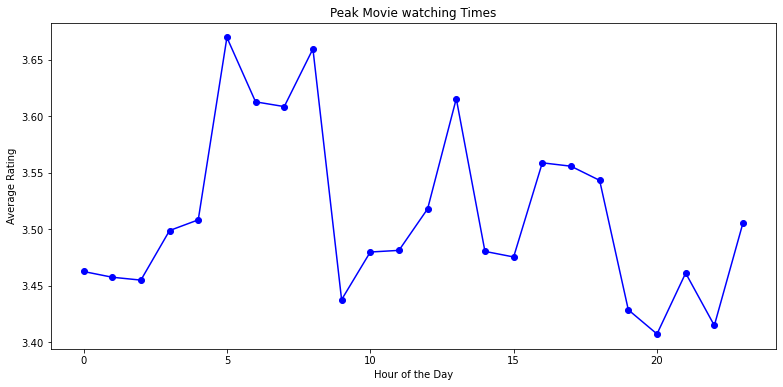

In [20]:
# Group by hour and calculate average rating
peak_viewing_times = movie_rating_df.groupby('hour')['rating'].mean()

# Plotting peak viewing time
plt.figure(figsize = (13, 6))
peak_viewing_times.plot(kind = 'line', marker = 'o', color = 'blue', title = 'Peak Movie watching Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rating')
plt.show()

## a) UNIVARIATE DATA ANALYSIS

In [21]:

# A function to create plots

def create_plots(df, plot_type, columns_to_plot = None, y = None):
    if plot_type == 'count_plot':
        plt.figure(figsize=(12,8))
        sns.countplot(data=df, x=columns_to_plot)
        plt.title(f'Distribution of movie {columns_to_plot}')
        plt.xticks(rotation=90)
        plt.show()
    elif plot_type == 'bar_plot1':
        plt.figure(figsize=(12, 7))
        sns.barplot(columns_to_plot.index, columns_to_plot.values)
        plt.title('Top 10 most frequently rated movies')
        plt.xlabel('Movie tile')
        plt.xticks(rotation=90)
        plt.ylabel('Count')
        plt.show()
    elif plot_type == 'bar_plot2':
        plt.figure(figsize=(12, 7))
        sns.barplot(columns_to_plot.index, columns_to_plot.values)
        plt.title('Top 10 most frequently rated movies and their average ratings')
        plt.xlabel('Movie tile')
        plt.xticks(rotation=90)
        plt.ylabel('Average Rating')
        plt.show()

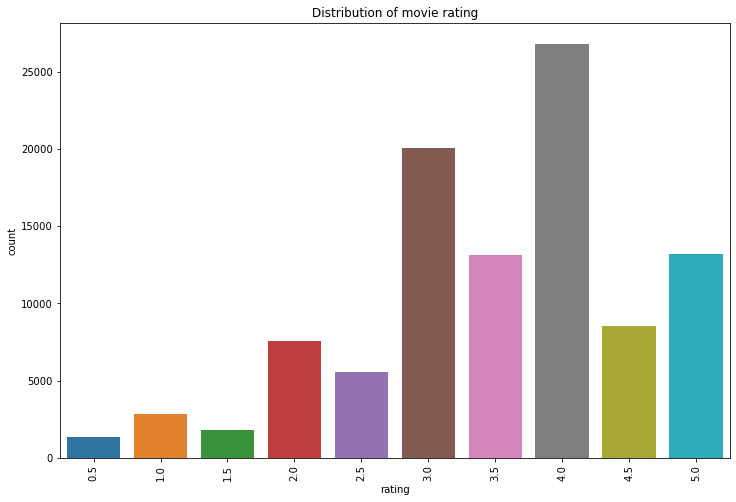

In [22]:
create_plots(movie_rating_df, 'count_plot', 'rating')

C:\Users\Rono\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


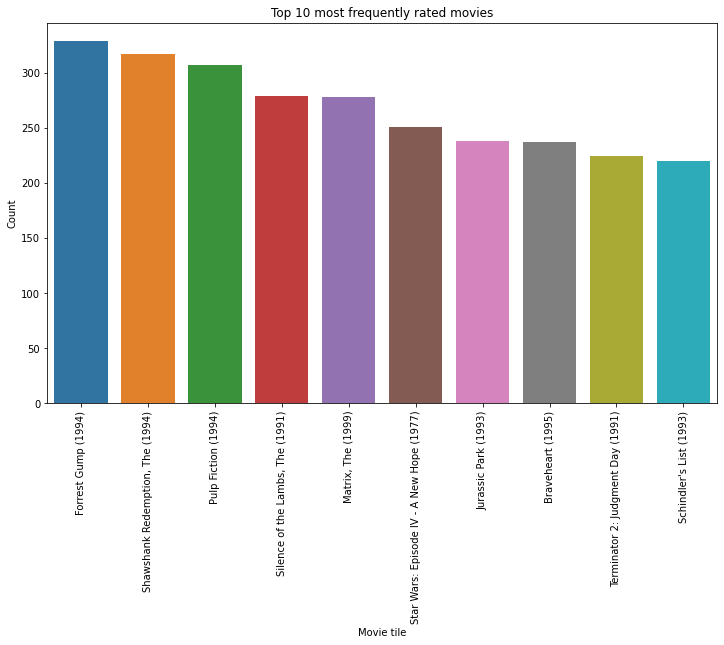

In [23]:
top_10_views = movie_rating_df['title'].value_counts().head(10)

create_plots(movie_rating_df, 'bar_plot1', top_10_views)

In [24]:
# Splitting the genres
def splitting_string(movies):
    movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
    from collections import Counter
    genre_frequency = Counter(g for genres in movies['genres'] for g in genres)
    
    return genre_frequency

genre_count = splitting_string(movie_rating_df)
genre_count

Counter({'Adventure': 24161,
         'Animation': 6988,
         'Children': 9208,
         'Comedy': 39053,
         'Fantasy': 11834,
         'Romance': 18124,
         'Drama': 41928,
         'Action': 30635,
         'Crime': 16681,
         'Thriller': 26452,
         'Horror': 7291,
         'Mystery': 7674,
         'Sci-Fi': 17243,
         'War': 4859,
         'Musical': 4138,
         'Documentary': 1219,
         'IMAX': 4145,
         'Western': 1930,
         'Film-Noir': 870,
         '(no genres listed)': 47})

In [25]:
new_df = movie_rating_df.copy()
new_df = new_df.explode('genres')
new_df

,movieId,title,genres,userId,rating,timestamp,hour,month
0,1,Toy Story (1995),Adventure,1,4.0,2000-07-30 18:45:03,18,7
0,1,Toy Story (1995),Animation,1,4.0,2000-07-30 18:45:03,18,7
0,1,Toy Story (1995),Children,1,4.0,2000-07-30 18:45:03,18,7
0,1,Toy Story (1995),Comedy,1,4.0,2000-07-30 18:45:03,18,7
0,1,Toy Story (1995),Fantasy,1,4.0,2000-07-30 18:45:03,18,7
...,...,...,...,...,...,...,...,...
100832,193583,No Game No Life: Zero (2017),Fantasy,184,3.5,2018-09-16 14:52:25,14,9
100833,193585,Flint (2017),Drama,184,3.5,2018-09-16 14:56:45,14,9
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action,184,3.5,2018-09-16 15:00:21,15,9
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,184,3.5,2018-09-16 15:00:21,15,9


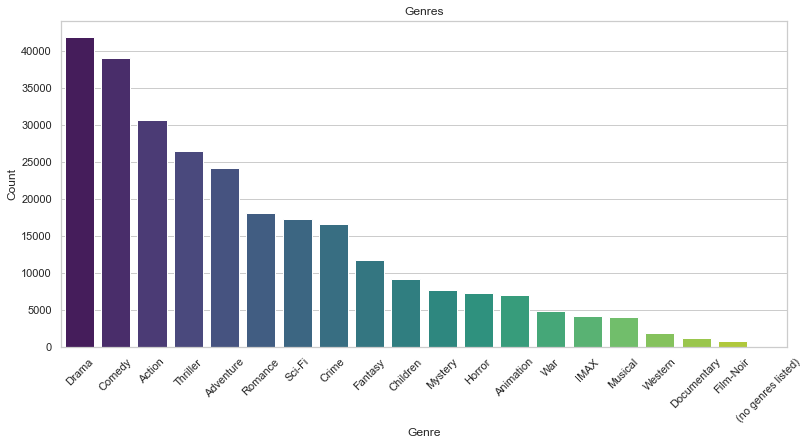

In [26]:
# visualization of genres from top to last

# Convert genre_count dictionary to a DataFrame
genre_df = pd.DataFrame(list(genre_count.items()), columns=['Genre', 'Count'])

# Sort DataFrame by Count in descending order
genre_df = genre_df.sort_values(by='Count', ascending=False)


all_genres = genre_df


# Plotting
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.barplot(x='Genre', y='Count', data=all_genres, palette="viridis")
plt.title('Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Average ratings per user
# Calculate the average rating per user
average_rating_per_user = ratings.groupby('userId')['rating'].mean()

# Display the average rating per user
print("Average rating per user:")
print(average_rating_per_user.head(10))

Average rating per user:
userId
1     4.366379
2     3.948276
3     2.435897
4     3.555556
5     3.636364
6     3.493631
7     3.230263
8     3.574468
9     3.260870
10    3.278571
Name: rating, dtype: float64


In [28]:
# Average rating per movie
avg_rating_per_movie = ratings.groupby('movieId')['rating'].mean()

print("Average rating per movie:")
print(avg_rating_per_movie.head(10))

Average rating per movie:
movieId
1     3.920930
2     3.431818
3     3.259615
4     2.357143
5     3.071429
6     3.946078
7     3.185185
8     2.875000
9     3.125000
10    3.496212
Name: rating, dtype: float64


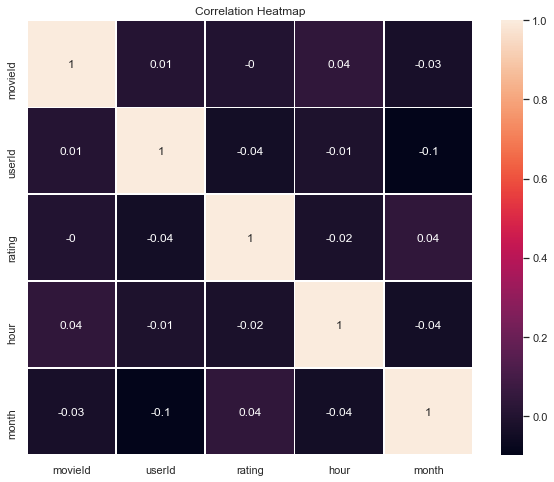

In [29]:
# Calculate the correlations
correlations = new_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(round(correlations, 2), annot=True, linewidths=.7)
plt.title('Correlation Heatmap')
plt.show()

## b) BIVARIATE DATA ANALYSIS

C:\Users\Rono\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


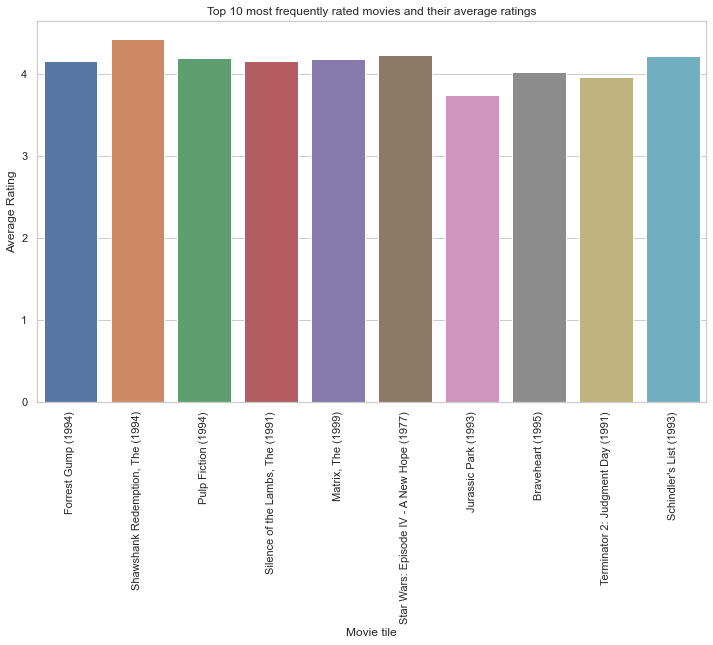

In [30]:
top_10_views = movie_rating_df['title'].value_counts().nlargest(10)
average_ratings = movie_rating_df.groupby('title')['rating'].mean().loc[top_10_views.index]


create_plots(movie_rating_df, 'bar_plot2', average_ratings)

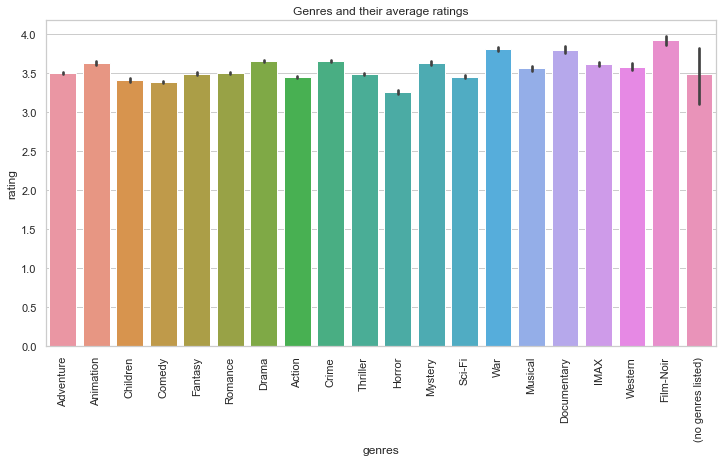

In [31]:
def bar_plot(x, y, data):
    
    plt.figure(figsize=(12,6))
    
    sns.barplot(x=x, y=y, data=data)
    plt.title('Genres and their average ratings')
    plt.xlabel(f'{x}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{y}')
    plt.show()

bar_plot('genres', 'rating', new_df)

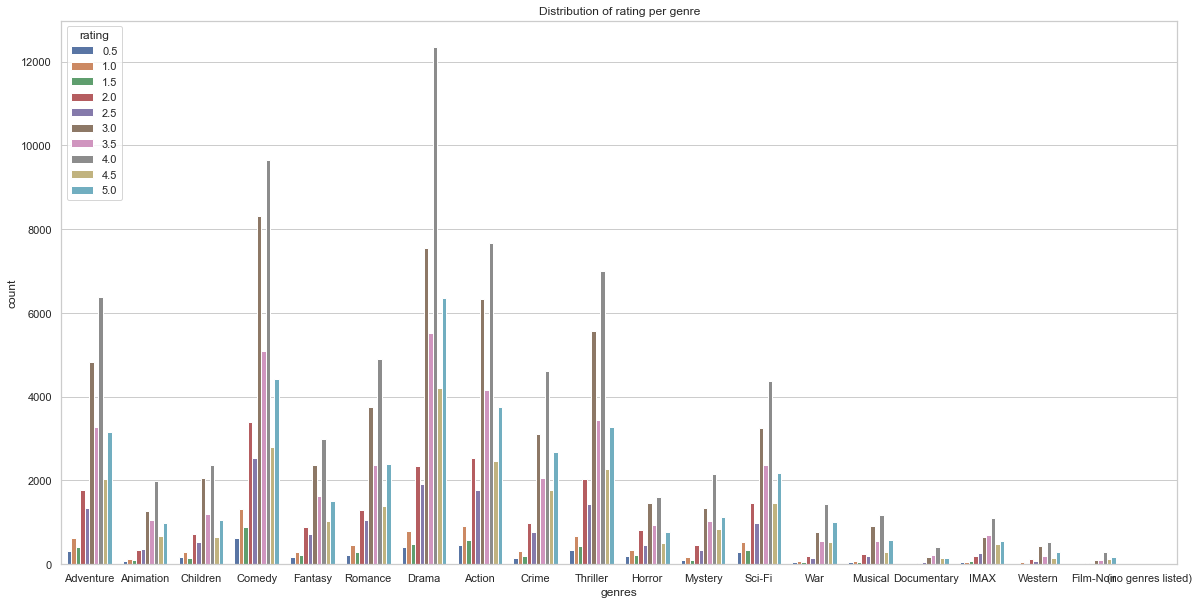

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(data=new_df, x='genres', hue='rating')
plt.title(f'Distribution of rating per genre')
plt.show()

# 5. Modelling 

In [33]:
from surprise import Reader, Dataset
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Select the necessary columns from the dataset 
user_item_df = movie_rating_df[['userId', 'movieId', 'rating']]

# Transform the pandas dataframe into Surprise dataset 
reader = Reader()
data = Dataset.load_from_df(user_item_df, reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=111)

# Print the number of unique users and items in the dataset
print("Number of users: ", trainset.n_users, "\n")
print("Number of items: ", trainset.n_items, "\n")

Number of users:  610 

Number of items:  8995 



# MODEL 1: KNN BASIC MODEL

In [35]:
# Function to create the model
def model_creation(approach, trainset, testset):
    if approach == SVD:
        model = approach(n_factors= 50, reg_all=0.05)
        model.fit(trainset)
        print(f'{approach.__name__} RMSE:', accuracy.rmse(model.test(testset)))
    else:    
        model = approach(sim_options={'name':'pearson', 'user_based':True})
        model.fit(trainset)
        print(f'{approach.__name__} RMSE:', accuracy.rmse(model.test(testset)))   

In [36]:
# Build a KNNBasic model
model_creation(KNNBasic, trainset, testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9721
KNNBasic RMSE: 0.9720846164183417


# Tune the KNNBasic Model

In [37]:
def param_grid_search(model_to_tune): 
    
    # Setting relevant parameters for Gridsearch
    grid = {
        'k': [30, 40],   # Number of neighbors
        'sim_options': {
            'name': ['cosine', 'pearson'],  # Similarity measures
            'user_based': [True],  # User-based collaborative filtering
        },
    }
    # Creating a parameter grid search for SVD model
    params = {'n_factors': [20, 50, 100],
         'reg_all': [0.02, 0.05, 0.1],
        #  'n_epochs': [5,10],
        # 'lr_all': [0.002,0.005]
         }

    # Running grid search with the defined parameter grid
    if model_to_tune == SVD:
        grid_search = GridSearchCV(model_to_tune, params,
                                    measures=['rmse'], n_jobs=-1)
    else:
        grid_search = GridSearchCV(model_to_tune, grid,
                                    measures=['rmse'], n_jobs=-1)
    grid_search.fit(data)
    print(f"Best RMSE for {model_to_tune.__name__}: {grid_search.best_score}")
    print(f"Best Hyperparameters for {model_to_tune.__name__}: {grid_search.best_params}")



In [38]:
# Grid search for KNNBasic Model
param_grid_search(KNNBasic)

Best RMSE for KNNBasic: {'rmse': 0.9722351668197309}
Best Hyperparameters for KNNBasic: {'rmse': {'k': 40, 'sim_options': {'name': 'cosine', 'user_based': True}}}


# MODEL 2: KNNBaseline Model

In [39]:
# Build a KNNBaseline model
model_creation(KNNBaseline, trainset, testset)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8790
KNNBaseline RMSE: 0.8789611074934803


# Tune the KNNBaseline Model

In [40]:
# Grid search for KNNBaseline Model
param_grid_search(KNNBaseline)

Best RMSE for KNNBaseline: {'rmse': 0.8775771167209072}
Best Hyperparameters for KNNBaseline: {'rmse': {'k': 40, 'sim_options': {'name': 'pearson', 'user_based': True}}}


# MODEL 3: KNNWithMeans Model

In [41]:
# Build a KNNWithMeans model
model_creation(KNNWithMeans, trainset, testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8995
KNNWithMeans RMSE: 0.8994971701396823


# Tune the KNNWithMeans Model

In [42]:
# Grid search for KNNWithMeans Model
param_grid_search(KNNWithMeans)

Best RMSE for KNNWithMeans: {'rmse': 0.8974930824147984}
Best Hyperparameters for KNNWithMeans: {'rmse': {'k': 40, 'sim_options': {'name': 'pearson', 'user_based': True}}}


# MODEL 4: SVD Model

In [43]:
# Build a SVD model
model_creation(SVD, trainset, testset)

RMSE: 0.8703
SVD RMSE: 0.8703067993507374


In [44]:
# Grid search for KNNWithMeans Model
param_grid_search(SVD)

Best RMSE for SVD: {'rmse': 0.8683348994144124}
Best Hyperparameters for SVD: {'rmse': {'n_factors': 20, 'reg_all': 0.02}}


# 6. MODEL SELECTION AND EVALUATION

SVD model performed best as compared to the rest of the models with a RMSE of 0.8688.

In [48]:
# A table that displays a summary of the validation metrics
def make_evaluation_table(metrics_dict):
    metrics_df = pd.DataFrame(metrics_dict)
    evaluation_table = metrics_df.to_html(index=False)
    return evaluation_table

metrics_dict = {
    'Model': ['KNNBasic', 'KNNBaseline', 'KNNWithMeans', 'SVD'],
    'RMSE': [0.9721, 0.8790, 0.8995, 0.8688],
    'RMSE after Tuning': [0.9719, 0.8776, 0.8964, 0.8691],
    }

evaluation_table = make_evaluation_table(metrics_dict)
HTML(evaluation_table)

Model,RMSE,RMSE after Tuning
KNNBasic,0.9721,0.9719
KNNBaseline,0.8790,0.8776
KNNWithMeans,0.8995,0.8964
SVD,0.8688,0.8691


In [49]:
# Final model selected
final_model = SVD(n_factors= 50, reg_all=0.05)
final_model.fit(trainset)

# 7. Model Predictions

In [50]:
user_34_prediction = final_model.predict(7, 2000)
user_34_prediction[3]

3.354730221675118

In [51]:
def movie_rater(movie_df,num, genre=None):
    userID = 1000
    rating_list = []
    while num > 0:
        if genre:
            movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list

In [53]:
user_rating = movie_rater(new_df, 4, 'Comedy')

       movieId                                     title  genres  userId  \
82226    44889  Reefer Madness: The Movie Musical (2005)  Comedy     356   

       rating           timestamp  hour  month  
82226     5.0 2008-12-13 04:00:43     4     12  
How do you rate this movie on a scale of 1-5, press n if you have not seen :
3
       movieId                 title  genres  userId  rating  \
18776      778  Trainspotting (1996)  Comedy     307     3.0   

                timestamp  hour  month  
18776 2007-08-03 17:18:48    17      8  
How do you rate this movie on a scale of 1-5, press n if you have not seen :
1
       movieId                    title  genres  userId  rating  \
77594     8961  Incredibles, The (2004)  Comedy     219     4.0   

                timestamp  hour  month  
77594 2007-11-10 09:13:17     9     11  
How do you rate this movie on a scale of 1-5, press n if you have not seen :
2
        movieId           title  genres  userId  rating           timestamp  \
10056

In [54]:
## add the new ratings to the original ratings DataFrame
user_ratings = pd.DataFrame(user_rating)
new_ratings_df = pd.concat([user_item_df, user_ratings], axis=0)
reader = Reader()
new_data = Dataset.load_from_df(new_ratings_df, reader)

In [55]:
new_data.df

,userId,movieId,rating
0,1,1,4
1,5,1,4
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5
...,...,...,...
100835,331,193609,4
0,1000,44889,3
1,1000,778,1
2,1000,8961,2


In [56]:
# train a model using the new combined DataFrame
svd_ = SVD(n_factors= 50, reg_all=0.05)
svd_.fit(new_data.build_full_trainset())

In [57]:
# make predictions for the user
# you'll probably want to create a list of tuples in the format (movie_id, predicted_score)
list_of_movies = []
for m_id in movie_rating_df['movieId'].unique():
    list_of_movies.append( (m_id,svd_.predict(1000,m_id)[3]))

In [59]:
# order the predictions from highest to lowest rated
ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)
ranked_movies

[(318, 3.8574333339622497),
 (1104, 3.796994664742766),
 (922, 3.782748967419726),
 (475, 3.7823183364140145),
 (3275, 3.766852141893677),
 (1283, 3.7607754936315203),
 (1204, 3.7460124613940633),
 (912, 3.7447047781383933),
 (48516, 3.742617734678759),
 (3468, 3.7421048638897463),
 (1209, 3.7411845508087422),
 (2324, 3.736903098693109),
 (3451, 3.7359854006890667),
 (1250, 3.730490015659406),
 (56782, 3.7020389381836636),
 (1193, 3.693186735938514),
 (2019, 3.692734386848574),
 (1207, 3.6900226114398396),
 (1262, 3.684545335287086),
 (4011, 3.6778515247646406),
 (720, 3.677724028821293),
 (93838, 3.6758850848193645),
 (1225, 3.6755281323587274),
 (908, 3.6743589585612204),
 (2160, 3.673457335699891),
 (1249, 3.671661891303289),
 (904, 3.669797127937252),
 (1198, 3.6684222947412173),
 (1276, 3.668128126960275),
 (930, 3.6630904398599933),
 (6787, 3.662976660542929),
 (7361, 3.6601221866603084),
 (1242, 3.659092298473012),
 (951, 3.658063188179228),
 (2959, 3.6551397597617483),
 (1221, 

In [60]:
def recommended_movies(user_ratings, movie_title_df, n):
    recommended_movies_set = set()  # Keep track of recommended movies

    for idx, rec in enumerate(user_ratings):
        movie_id = int(rec[0])
        title_array = movie_title_df.loc[movie_title_df['movieId'] == movie_id, 'title'].values

        # Check if the array is not empty and the movie has not been recommended before
        if title_array.any() and title_array[0] not in recommended_movies_set:
            title = title_array[0]
            print('Recommendation #', idx+1, ':', title, '\n')
            recommended_movies_set.add(title)  # Add the movie to the set of recommended movies
            n -= 1

        if n == 0:
            break

# Example usage
recommended_movies(ranked_movies, movie_rating_df, 5)

Recommendation # 1 : Shawshank Redemption, The (1994) 

Recommendation # 2 : Streetcar Named Desire, A (1951) 

Recommendation # 3 : Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) 

Recommendation # 4 : In the Name of the Father (1993) 

Recommendation # 5 : Boondock Saints, The (2000) 

